## Import Data

In [277]:
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

df = pd.read_csv('cars_10_16_23.csv', index_col=0)

print(df.shape)
print(df.dtypes)
df.head()

(11304, 41)
Represented Test Veh Make          object
Aftertreatment Device Desc         object
Transmission Overdrive Desc        object
Equivalent Test Weight (lbs.)       int64
Represented Test Veh Model         object
Drive System Description           object
Test Veh Displacement (L)         float64
Shift Indicator Light Use Desc     object
N/V Ratio                         float64
Rated Horsepower                    int64
Test Veh Configuration #            int64
# of Cylinders and Rotors         float64
Target Coef B (lbf/mph)           float64
Target Coef A (lbf)               float64
Test Number                        object
CO (g/mi)                         float64
Test Category                      object
Aftertreatment Device Cd           object
THC (g/mi)                        float64
CH4 (g/mi)                        float64
Test Fuel Type Cd                   int64
Model Year                          int64
FE_UNIT                            object
Set Coef C (lbf/mph**2

,Represented Test Veh Make,Aftertreatment Device Desc,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Represented Test Veh Model,Drive System Description,Test Veh Displacement (L),Shift Indicator Light Use Desc,N/V Ratio,Rated Horsepower,...,Test Vehicle ID,NOx (g/mi),RND_ADJ_FE,CO2 (g/mi),Tested Transmission Type Code,PM (g/mi),Vehicle Type,Set Coef B (lbf/mph),N2O (g/mi),Target Coef C (lbf/mph**2)
0,Aston Martin,Three-way catalyst,Top gear ratio < 1,4500,DB11 V8,"2-Wheel Drive, Rear",4.0,Not eqipped,22.2,503,...,562TT5348,0.0290,22.7,386.66,SA,NaN,Car,0.0919,0.0064,0.0271
1,Aston Martin,Three-way catalyst,Top gear ratio < 1,4500,DB11 V8,"2-Wheel Drive, Rear",4.0,Not eqipped,22.2,503,...,562TT5348,0.0020,33.8,259.74,SA,NaN,Car,0.0919,NaN,0.0271
2,Aston Martin,Three-way catalyst,Top gear ratio < 1,4500,DBS,"2-Wheel Drive, Rear",5.2,Not eqipped,23.0,715,...,7002PT7056,0.0262,17.7,499.69,SA,NaN,Car,0.0807,0.0000,0.0271
3,Aston Martin,Three-way catalyst,Top gear ratio < 1,4500,DBS,"2-Wheel Drive, Rear",5.2,Not eqipped,23.0,715,...,7002PT7056,0.0070,30.6,290.25,SA,NaN,Car,0.0807,NaN,0.0271
4,Aston Martin,Three-way catalyst,Top gear ratio < 1,5500,DBX,4-Wheel Drive,4.0,Not eqipped,21.0,550,...,8001PT8342,0.0090,17.2,521.26,A,NaN,Both,-0.5318,NaN,0.0373


## EDA

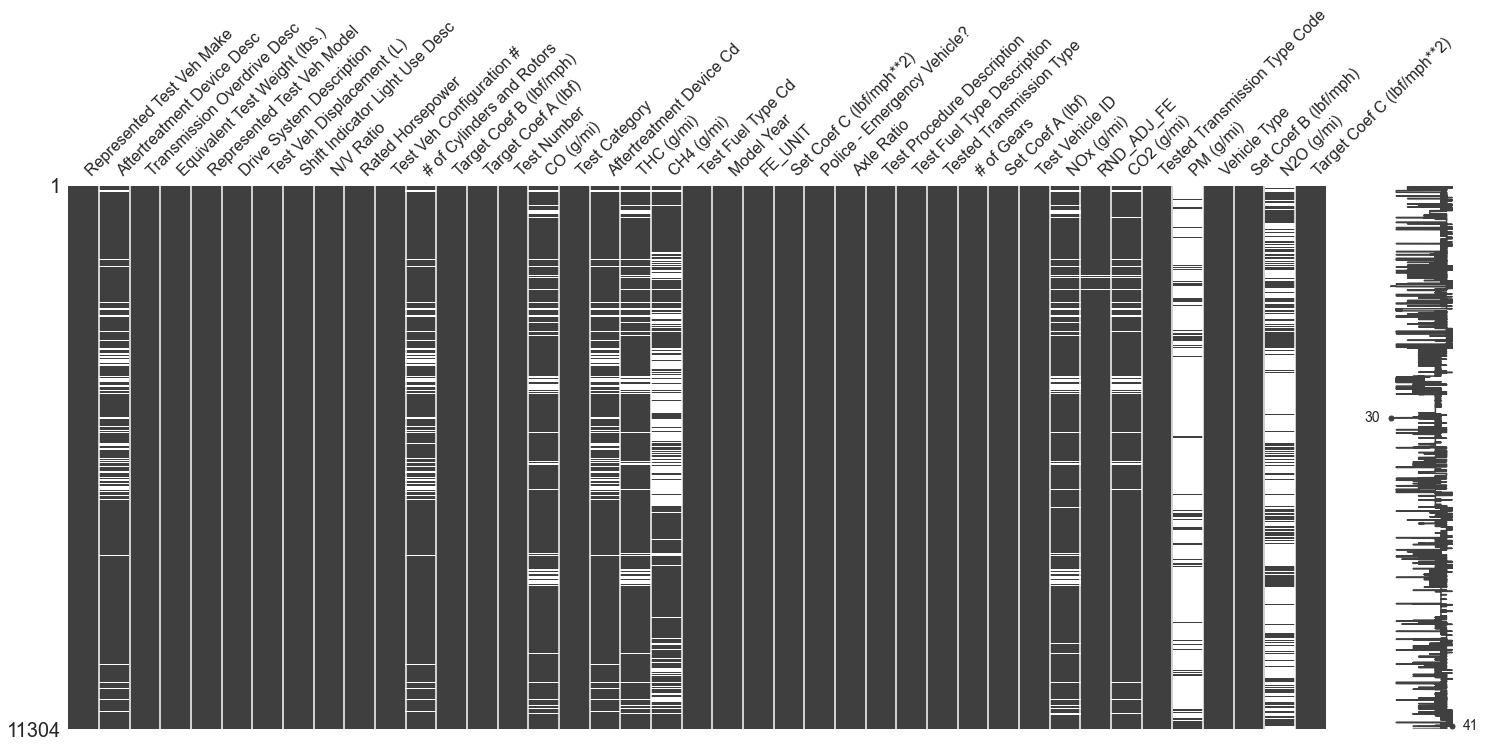

In [278]:
import missingno as msno

# Show the missing values.
msno.matrix(df);

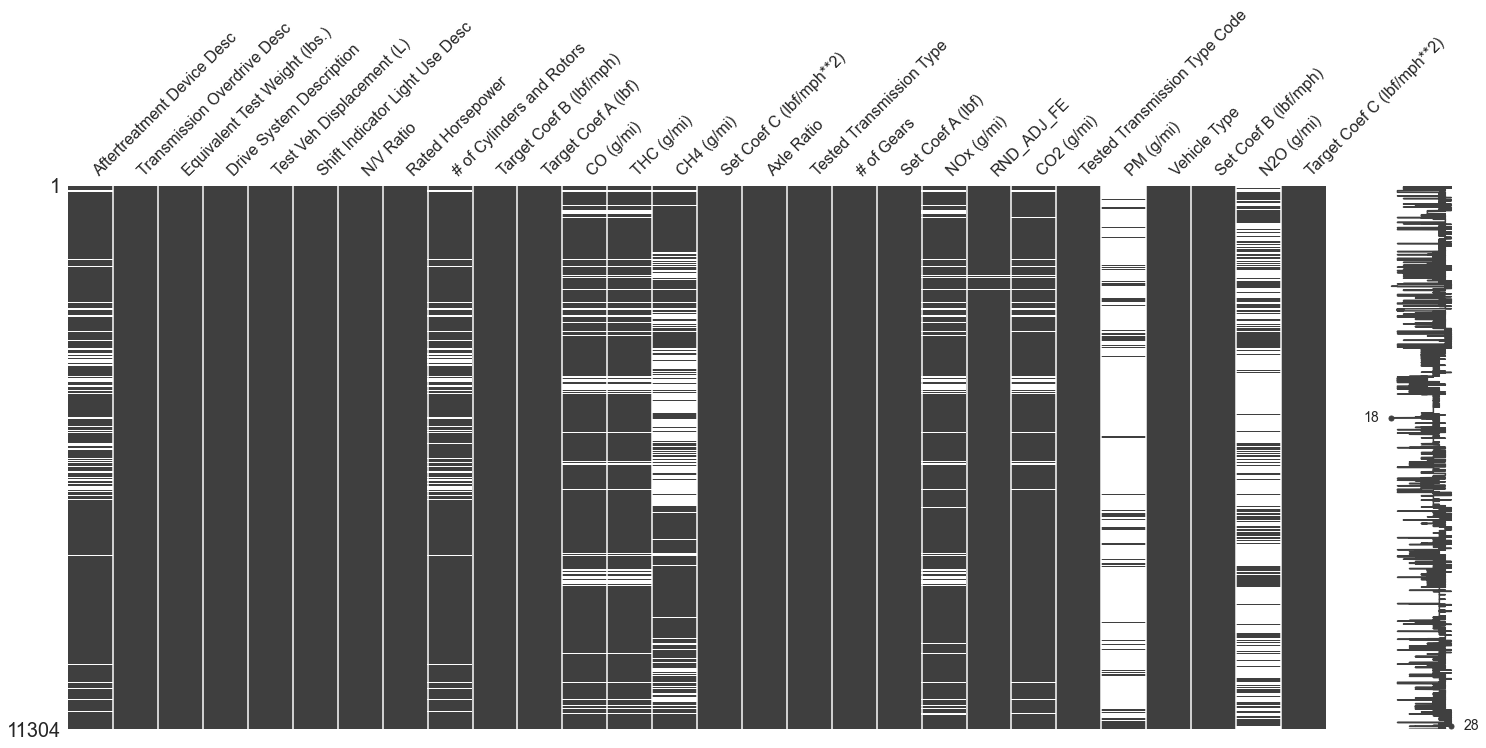

In [279]:
# Drop features which are less meaningful.

df_meaningful = df.drop(['Represented Test Veh Make', 'Represented Test Veh Model', 'Test Veh Configuration #', 'Test Number', 'Test Category', 'Aftertreatment Device Cd', 'Model Year', 'FE_UNIT', 'Police - Emergency Vehicle?', 'Test Procedure Description', 'Test Fuel Type Description', 'Test Vehicle ID', 'Test Fuel Type Cd'], axis=1)

# Show missing values after dropping above features.
msno.matrix(df_meaningful);

In [280]:
# Drop features with too many missing values and then drop NA.
df_dna = df_meaningful.drop(['CH4 (g/mi)', 'PM (g/mi)', 'N2O (g/mi)'], axis=1)
df_dna.dropna(inplace=True)

# Show number of rows and columns
print(df_dna.shape)
print(df_dna.dtypes)
df_dna.head()

(9153, 25)
Aftertreatment Device Desc         object
Transmission Overdrive Desc        object
Equivalent Test Weight (lbs.)       int64
Drive System Description           object
Test Veh Displacement (L)         float64
Shift Indicator Light Use Desc     object
N/V Ratio                         float64
Rated Horsepower                    int64
# of Cylinders and Rotors         float64
Target Coef B (lbf/mph)           float64
Target Coef A (lbf)               float64
CO (g/mi)                         float64
THC (g/mi)                        float64
Set Coef C (lbf/mph**2)           float64
Axle Ratio                        float64
Tested Transmission Type           object
# of Gears                          int64
Set Coef A (lbf)                  float64
NOx (g/mi)                        float64
RND_ADJ_FE                        float64
CO2 (g/mi)                        float64
Tested Transmission Type Code      object
Vehicle Type                       object
Set Coef B (lbf/mph)   

,Aftertreatment Device Desc,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Drive System Description,Test Veh Displacement (L),Shift Indicator Light Use Desc,N/V Ratio,Rated Horsepower,# of Cylinders and Rotors,Target Coef B (lbf/mph),...,Tested Transmission Type,# of Gears,Set Coef A (lbf),NOx (g/mi),RND_ADJ_FE,CO2 (g/mi),Tested Transmission Type Code,Vehicle Type,Set Coef B (lbf/mph),Target Coef C (lbf/mph**2)
0,Three-way catalyst,Top gear ratio < 1,4500,"2-Wheel Drive, Rear",4.0,Not eqipped,22.2,503,8.0,0.0169,...,Semi-Automatic,8,11.26,0.0290,22.7,386.66,SA,Car,0.0919,0.0271
1,Three-way catalyst,Top gear ratio < 1,4500,"2-Wheel Drive, Rear",4.0,Not eqipped,22.2,503,8.0,0.0169,...,Semi-Automatic,8,11.26,0.0020,33.8,259.74,SA,Car,0.0919,0.0271
2,Three-way catalyst,Top gear ratio < 1,4500,"2-Wheel Drive, Rear",5.2,Not eqipped,23.0,715,12.0,0.0169,...,Semi-Automatic,8,6.81,0.0262,17.7,499.69,SA,Car,0.0807,0.0271
3,Three-way catalyst,Top gear ratio < 1,4500,"2-Wheel Drive, Rear",5.2,Not eqipped,23.0,715,12.0,0.0169,...,Semi-Automatic,8,6.81,0.0070,30.6,290.25,SA,Car,0.0807,0.0271
4,Three-way catalyst,Top gear ratio < 1,5500,4-Wheel Drive,4.0,Not eqipped,21.0,550,8.0,-0.3286,...,Automatic,9,-4.88,0.0090,17.2,521.26,A,Both,-0.5318,0.0373


In [281]:
# Drop outliers by features in assignment 4.

import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

df_ass4 = df_dna[['Rated Horsepower', 'Equivalent Test Weight (lbs.)', 'RND_ADJ_FE', 'CO2 (g/mi)']]

# Identify outliers using LocalOutlierFactor.
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred_lof = lof.fit_predict(df_ass4)

# Identify outliers using IsolationForest.
iforest = IsolationForest(n_estimators=100,  contamination=0.05)
y_pred_if = iforest.fit_predict(df_ass4)

# Identify outliers using EllipticEnvelope.
rob_cov = EllipticEnvelope(contamination=0.05)
y_pred_rob = rob_cov.fit_predict(df_ass4)

df_ass4["y_pred_lof"] = y_pred_lof
df_ass4["y_pred_if"] = y_pred_if
df_ass4["y_pred_rob"] = y_pred_rob

# -----------------------------------------------------------------------------
# Converting them to a binary -1, 0.
# Where -1 denotes outlier
# The purpose is to then add these columns and find out which rows were identified as outliers from multiple methods
# -----------------------------------------------------------------------------
df_ass4["y_pred_lof_2"] = np.where(df_ass4["y_pred_lof"]<0, -1, 0)
df_ass4["y_pred_if_2"] = np.where(df_ass4["y_pred_if"]<0, -1, 0)
df_ass4["y_pred_rob_2"] = np.where(df_ass4["y_pred_rob"]<0, -1, 0)

# -----------------------------------------------------------------------------
# List of food items identified as outliers based by at least two methods
# -----------------------------------------------------------------------------
df_ass4["all_out"] = df_ass4.loc[:,["y_pred_if_2","y_pred_rob_2","y_pred_lof_2"]].sum(axis = 1)
print(df_ass4["all_out"].value_counts())

# Dop outliers.
df_dol = df_dna[df_ass4['all_out'] >= -1]

# Show number of rows and columns after dropping outliers
print(df_dol.shape)
print(df_dol.dtypes)

 0    8194
-1     608
-2     287
-3      64
Name: all_out, dtype: int64
(8802, 25)
Aftertreatment Device Desc         object
Transmission Overdrive Desc        object
Equivalent Test Weight (lbs.)       int64
Drive System Description           object
Test Veh Displacement (L)         float64
Shift Indicator Light Use Desc     object
N/V Ratio                         float64
Rated Horsepower                    int64
# of Cylinders and Rotors         float64
Target Coef B (lbf/mph)           float64
Target Coef A (lbf)               float64
CO (g/mi)                         float64
THC (g/mi)                        float64
Set Coef C (lbf/mph**2)           float64
Axle Ratio                        float64
Tested Transmission Type           object
# of Gears                          int64
Set Coef A (lbf)                  float64
NOx (g/mi)                        float64
RND_ADJ_FE                        float64
CO2 (g/mi)                        float64
Tested Transmission Type Code      

## Before Training

In [282]:
# Remove all vehicles with mpg > 120
df_dmpl = df_dol.drop(df_dol['RND_ADJ_FE'] > 120)

df_dmpl.shape

(8800, 25)

In [283]:
# Identify features and responses.
# In both y_CO2 and y_CO, 0 means Other and 1 means High.
X = df_dmpl.drop(['CO2 (g/mi)', 'CO (g/mi)'], axis=1)
y_CO2 = np.where(df_dmpl['CO2 (g/mi)'] > 600, 1, 0)
y_CO = np.where(df_dmpl['CO (g/mi)'] > 1, 1, 0)
X.shape

(8800, 23)

In [284]:
# Encode categorical features.
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(sparse=False)
X_num = df_dmpl.select_dtypes(include=[np.float])
X_num.reset_index(inplace=True, drop=True)
scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(X_num))

X_cat = df_dmpl.select_dtypes(include=[np.object])
X_cat.reset_index(inplace=True, drop=True)

X_cat = pd.DataFrame(ohe.fit_transform(X_cat))
X_final = pd.concat([X_num, X_cat], axis=1)
X_final.reset_index(inplace=True, drop=True)
X_final.set_axis(list(range(X_final.shape[1])), inplace=True, axis=1)
print(X_num.shape, X_cat.shape, X_final.shape)

(8800, 15) (8800, 38) (8800, 53)


## Train model with CO2

In [285]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_CO2, test_size = 0.2, random_state=42)

## <font color = green> Decision tree

In [286]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

# ---------------------------------------------------------------
# Train a decision tree classifier on the balanced dataset
# ---------------------------------------------------------------

clf = DecisionTreeClassifier(criterion='gini',
                             min_samples_split=5,
                             min_samples_leaf=5)
clf.fit(X_train, y_train)

# --------------------------------------------
# Evaluate the classifier on the testing set
# --------------------------------------------
y_pred_dt = clf.predict(X_test)
print(classification_report(y_test, y_pred_dt))

# confusion_matrix(y_test, y_pred_dt)

# Confusion Matrix
pd.crosstab(y_pred_dt, y_test, rownames =['y_pred_dt'], colnames = ['y_test'] )


# -------------------------------------------------------
# Notes for reading the classification report
# -------------------------------------------------------

# --------------
# Precision:
# --------------
# Measures the proportion of true positives (TP) out of all predicted positives (TP + false positives (FP)).
# A high precision means the model makes few false positive predictions.

# --------------
# Recall:
# --------------
# Measures the proportion of true positives (TP) out of all actual positives (TP + false negatives (FN)). \
# A high recall indicates that the model makes few false negative predictions.

# --------------
# F1-score:
# --------------
# It is the harmonic mean of precision and recall, calculated as (2 * precision * recall) / (precision + recall).
# It is useful especially when the classes are imbalanced

# --------------
# Support:
# --------------
# It is the number of observations in each class.

# --------------
# Weighted Average:
# --------------
# It is calculated as the average of the precision, recall etc. weighted by the number of samples in each class.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1757
           1       1.00      1.00      1.00         3

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760



y_test,0,1
y_pred_dt,,
0,1757,0
1,0,3


## <font color = green> Random Forest

In [287]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ------------------
# Define the RF model
# ------------------
rf = RandomForestClassifier(n_estimators=1000,
                            criterion='entropy',
                            min_samples_split=5,
                            min_samples_leaf=5,
                            random_state=100)

# ------------------
# Train the models
# ------------------
rf.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_rf = rf.predict(X_test)

# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Random Forest Precision:', precision_score(y_test, y_pred_rf))
print('Random Forest Recall:', recall_score(y_test, y_pred_rf))
print('Random Forest F1 Score:', f1_score(y_test, y_pred_rf))

print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
pd.crosstab(y_pred_rf, y_test, rownames =['y_pred_rf'], colnames = ['y_test'] )

Random Forest Accuracy: 0.9988636363636364
Random Forest Precision: 1.0
Random Forest Recall: 0.3333333333333333
Random Forest F1 Score: 0.5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1757
           1       1.00      0.33      0.50         3

    accuracy                           1.00      1760
   macro avg       1.00      0.67      0.75      1760
weighted avg       1.00      1.00      1.00      1760



y_test,0,1
y_pred_rf,,
0,1757,2
1,0,1


## <font color = darkgreen> Gradient Boosting Classifier

In [288]:
from sklearn.ensemble import GradientBoostingClassifier

# ------------------
# Define the GB model
# ------------------
gb = GradientBoostingClassifier(n_estimators=500,
                            min_samples_split=5,
                            learning_rate=0.5,
                            min_samples_leaf=5,
                            random_state=100)

# ------------------
# Train the model
# ------------------
gb.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_gb = gb.predict(X_test)

# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------

print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_gb))
print('Gradient Boosting Precision:', precision_score(y_test, y_pred_gb))
print('Gradient Boosting Recall:', recall_score(y_test, y_pred_gb))
print('Gradient Boosting F1 Score:', f1_score(y_test, y_pred_gb))

print(classification_report(y_test, y_pred_gb))
# Confusion Matrix
pd.crosstab(y_pred_gb, y_test, rownames =['y_pred_gb'], colnames = ['y_test'] )

Gradient Boosting Accuracy: 1.0
Gradient Boosting Precision: 1.0
Gradient Boosting Recall: 1.0
Gradient Boosting F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1757
           1       1.00      1.00      1.00         3

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760



y_test,0,1
y_pred_gb,,
0,1757,0
1,0,3


## <font color = Green> XGBoost

In [289]:
import xgboost as xgb

# ------------------
# Define the XGB model
# ------------------
xgb = xgb.XGBClassifier(n_estimators=100,
                        max_depth = 10,
                        eta= 0.01,
                        min_child_weight = 5,
                        random_state=100)

# ------------------
# Train the model
# ------------------
xgb.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_xgb = xgb.predict(X_test)

# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------

print('XGB:', accuracy_score(y_test, y_pred_xgb))
print('XGB:', precision_score(y_test, y_pred_xgb))
print('XGB:', recall_score(y_test, y_pred_xgb))
print('XGB:', f1_score(y_test, y_pred_xgb))

print(classification_report(y_test, y_pred_xgb))
# Confusion Matrix
pd.crosstab(y_pred_xgb, y_test, rownames =['y_pred_xgb'], colnames = ['y_test'] )

XGB: 0.9982954545454545
XGB: 0.0
XGB: 0.0
XGB: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1757
           1       0.00      0.00      0.00         3

    accuracy                           1.00      1760
   macro avg       0.50      0.50      0.50      1760
weighted avg       1.00      1.00      1.00      1760



y_test,0,1
y_pred_xgb,,
0,1757,3


## Analysis

Decision Tree and Gradient Boost performs perfect in this problem while Random Forest predicts every observation to be Other and XGBoost makes some mistake on predicting some Other to be High.

## Train model with CO

In [290]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_CO, test_size=0.2, random_state=42)


## <font color = green> Decision tree

In [291]:

# ---------------------------------------------------------------
# Train a decision tree classifier on the balanced dataset
# ---------------------------------------------------------------

clf = DecisionTreeClassifier(criterion='gini',
							 min_samples_split=5,
							 min_samples_leaf=5)
clf.fit(X_train, y_train)

# --------------------------------------------
# Evaluate the classifier on the testing set
# --------------------------------------------
y_pred_dt = clf.predict(X_test)
print(classification_report(y_test, y_pred_dt))

# confusion_matrix(y_test, y_pred_dt)

# Confusion Matrix
pd.crosstab(y_pred_dt, y_test, rownames=['y_pred_dt'], colnames=['y_test'])

# -------------------------------------------------------
# Notes for reading the classification report
# -------------------------------------------------------

# --------------
# Precision:
# --------------
# Measures the proportion of true positives (TP) out of all predicted positives (TP + false positives (FP)).
# A high precision means the model makes few false positive predictions.

# --------------
# Recall:
# --------------
# Measures the proportion of true positives (TP) out of all actual positives (TP + false negatives (FN)). \
# A high recall indicates that the model makes few false negative predictions.

# --------------
# F1-score:
# --------------
# It is the harmonic mean of precision and recall, calculated as (2 * precision * recall) / (precision + recall).
# It is useful especially when the classes are imbalanced

# --------------
# Support:
# --------------
# It is the number of observations in each class.

# --------------
# Weighted Average:
# --------------
# It is calculated as the average of the precision, recall etc. weighted by the number of samples in each class.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1671
           1       1.00      1.00      1.00        89

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760



y_test,0,1
y_pred_dt,,
0,1671,0
1,0,89



## <font color = green> Random Forest

In [292]:
# ------------------
# Define the RF model
# ------------------
rf = RandomForestClassifier(n_estimators=1000,
							criterion='entropy',
							min_samples_split=5,
							min_samples_leaf=5,
							random_state=100)

# ------------------
# Train the models
# ------------------
rf.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_rf = rf.predict(X_test)

# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Random Forest Precision:', precision_score(y_test, y_pred_rf))
print('Random Forest Recall:', recall_score(y_test, y_pred_rf))
print('Random Forest F1 Score:', f1_score(y_test, y_pred_rf))

print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
pd.crosstab(y_pred_rf, y_test, rownames=['y_pred_rf'], colnames=['y_test'])

Random Forest Accuracy: 1.0
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1671
           1       1.00      1.00      1.00        89

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760



y_test,0,1
y_pred_rf,,
0,1671,0
1,0,89



## <font color = darkgreen> Gradient Boosting Classifier

In [293]:
# ------------------
# Define the GB model
# ------------------
gb = GradientBoostingClassifier(n_estimators=500,
								min_samples_split=5,
								learning_rate=0.5,
								min_samples_leaf=5,
								random_state=100)

# ------------------
# Train the model
# ------------------
gb.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_gb = gb.predict(X_test)

# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------

print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_gb))
print('Gradient Boosting Precision:', precision_score(y_test, y_pred_gb))
print('Gradient Boosting Recall:', recall_score(y_test, y_pred_gb))
print('Gradient Boosting F1 Score:', f1_score(y_test, y_pred_gb))

print(classification_report(y_test, y_pred_gb))
# Confusion Matrix
pd.crosstab(y_pred_gb, y_test, rownames=['y_pred_gb'], colnames=['y_test'])

Gradient Boosting Accuracy: 1.0
Gradient Boosting Precision: 1.0
Gradient Boosting Recall: 1.0
Gradient Boosting F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1671
           1       1.00      1.00      1.00        89

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760



y_test,0,1
y_pred_gb,,
0,1671,0
1,0,89



## <font color = Green> XGBoost

In [296]:
import xgboost as xgb
# ------------------
# Define the XGB model
# ------------------
xgb = xgb.XGBClassifier(n_estimators=100,
						max_depth=10,
						eta=0.01,
						min_child_weight=5,
						random_state=100)

# ------------------
# Train the model
# ------------------
xgb.fit(X_train, y_train)

# ------------------------------------
# Make predictions on the test set
# ------------------------------------
y_pred_xgb = xgb.predict(X_test)

# ------------------------------------------------------------------------
# Evaluate the model using accuracy, precision, recall, and F1 score
# ------------------------------------------------------------------------

print('XGB:', accuracy_score(y_test, y_pred_xgb))
print('XGB:', precision_score(y_test, y_pred_xgb))
print('XGB:', recall_score(y_test, y_pred_xgb))
print('XGB:', f1_score(y_test, y_pred_xgb))

print(classification_report(y_test, y_pred_xgb))
# Confusion Matrix
pd.crosstab(y_pred_xgb, y_test, rownames=['y_pred_xgb'], colnames=['y_test'])

XGB: 1.0
XGB: 1.0
XGB: 1.0
XGB: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1671
           1       1.00      1.00      1.00        89

    accuracy                           1.00      1760
   macro avg       1.00      1.00      1.00      1760
weighted avg       1.00      1.00      1.00      1760



y_test,0,1
y_pred_xgb,,
0,1671,0
1,0,89


## Compare Pollutant Level

In [297]:
# Get pollutants of year 2023, 2016, and 2010.

pollutant_2023 = df.loc[df['Model Year'] == 2023, ['CO2 (g/mi)', 'CO (g/mi)']].copy()
pollutant_2023.dropna(inplace=True)
pollutant_2016 = df.loc[df['Model Year'] == 2016, ['CO2 (g/mi)', 'CO (g/mi)']].copy()
pollutant_2016.dropna(inplace=True)
pollutant_2010 = df.loc[df['Model Year'] == 2010, ['CO2 (g/mi)', 'CO (g/mi)']].copy()
pollutant_2010.dropna(inplace=True)

print(pollutant_2023.shape, pollutant_2016.shape, pollutant_2010.shape)

(2877, 2) (4213, 2) (2984, 2)


In [298]:
# Perform the one-sided z test on data of 2023, 2016, and 2010.

from statsmodels.stats.weightstats import ztest

print(ztest(pollutant_2023, pollutant_2016, value=0, alternative='smaller'))
print(ztest(pollutant_2016, pollutant_2010, value=0, alternative='smaller'))

(array([4.36271707, 0.84888014]), array([0.99999358, 0.80202601]))
(array([-18.08112184,  -2.97461647]), array([2.24428186e-73, 1.46677536e-03]))


## Conclusion on Pollutant Level

The z test above shows that from 2010 to 2016, the pollutant level for both CO2 and CO decreased. From 2016 to 2023, the pollutant level of CO2 increased while there isn't sufficient evidence to determine the change on CO.

## Nearest neighbor

In [299]:
# Get the name of numeric features

feature_name = list(df_dmpl.select_dtypes(include=[np.float]).columns)
feature_name.append('Represented Test Veh Model')
feature_name.append('Model Year')
feature_name

['Test Veh Displacement (L)',
 'N/V Ratio',
 '# of Cylinders and Rotors',
 'Target Coef B (lbf/mph)',
 'Target Coef A (lbf)',
 'CO (g/mi)',
 'THC (g/mi)',
 'Set Coef C (lbf/mph**2)',
 'Axle Ratio',
 'Set Coef A (lbf)',
 'NOx (g/mi)',
 'RND_ADJ_FE',
 'CO2 (g/mi)',
 'Set Coef B (lbf/mph)',
 'Target Coef C (lbf/mph**2)',
 'Represented Test Veh Model',
 'Model Year']

In [300]:
# Find the models that appear in all three years.
df_nn = df[feature_name].copy()
df_nn = df_nn.reset_index(drop=True)
df_nn = df_nn.dropna()

memo = {}
for idx, row in df_nn.iterrows():
    if row['Represented Test Veh Model'] in memo:
        memo[row['Represented Test Veh Model']].add(row['Model Year'])
    else:
        memo[row['Represented Test Veh Model']] = {row['Model Year']}

print([x for x in memo if len(memo[x]) == 3])


['MALIBU', 'MAZDA3', 'C 300', 'C 300 4MATIC', 'E 350', 'E 350 4MATIC', 'Cayenne', 'Cayenne GTS', 'Cayenne S', 'Panamera 4S', 'GX 460', '4RUNNER 2WD', '4RUNNER 4WD', 'CAMRY', 'SEQUOIA 2WD', 'SEQUOIA 4WD', 'A3', 'A4', 'A6', 'Q5', 'GTI', 'Jetta']


In [301]:
# Find the indices of interested vehicles.

vehicles_name = ['4RUNNER 4WD', 'CAMRY', 'Cayenne', 'SEQUOIA 4WD', 'MAZDA3']

for name in vehicles_name:
    print(name)
    print(df_nn[df_nn['Represented Test Veh Model'] == name]['Model Year'])
    print()

4RUNNER 4WD
2716     2023
2717     2023
2718     2023
2719     2023
2720     2023
2721     2023
6171     2010
6172     2010
10605    2016
10606    2016
10607    2016
10608    2016
10609    2016
Name: Model Year, dtype: int64

CAMRY
2734     2023
2735     2023
6175     2010
6176     2010
6177     2010
6178     2010
6179     2010
6180     2010
6181     2010
6182     2010
10610    2016
10611    2016
10612    2016
10613    2016
Name: Model Year, dtype: int64

Cayenne
2373     2023
2374     2023
5909     2010
5910     2010
5911     2010
5912     2010
10155    2016
10156    2016
Name: Model Year, dtype: int64

SEQUOIA 4WD
2892     2023
2893     2023
2894     2023
2895     2023
6292     2010
6293     2010
6294     2010
6295     2010
6296     2010
6297     2010
6298     2010
6299     2010
6300     2010
6301     2010
6302     2010
6303     2010
6304     2010
6305     2010
10792    2016
10793    2016
10794    2016
10795    2016
Name: Model Year, dtype: int64

MAZDA3
2027    2023
2028    2023
507

In [302]:
# Split data into three years.

data = {}
data[2010] = df_nn.loc[df_nn['Model Year'] == 2010]
data[2016] = df_nn.loc[df_nn['Model Year'] == 2016]
data[2023] = df_nn.loc[df_nn['Model Year'] == 2023]

In [303]:
from sklearn.neighbors import BallTree
from sklearn.neighbors import KDTree

# Train for 5 models
for name in vehicles_name:
    print("Now for vehicle: " + name + '\n')
    # Train for 3 years.
    for year in [2010, 2016, 2023]:
        X = data[year].iloc[:, :-2]
        print('In year: ' + str(year))
        ball = BallTree(X, leaf_size=2)
        idx = X[data[year]['Represented Test Veh Model'] == name].index[0]

        q = [X.loc[idx]]
        dist_ball, ind_ball = ball.query(q, k=5)
        print(f"Ball tree: the nearest vehicles to Row {idx} are:")
        print(data[year]['Represented Test Veh Model'].iloc[ind_ball[0]])
        print(f"\nAnd the respective distances are: {dist_ball}")

        print()
        kd = KDTree(X, leaf_size=2)
        dist_kd, ind_kd = kd.query(q, k=5)
        print(f'KD Tree: the nearest indices to Row {idx} are:')
        print(data[year]['Represented Test Veh Model'].iloc[ind_ball[0]])
        print(f'\nAnd the respective distances are:{dist_kd}\n')

Now for vehicle: 4RUNNER 4WD

In year: 2010
Ball tree: the nearest vehicles to Row 6171 are:
6171       4RUNNER 4WD
6604        V50 T5 AWD
6221    FJ CRUISER 4WD
3771             535iA
4474             1LH26
Name: Represented Test Veh Model, dtype: object

And the respective distances are: [[0.         4.57916824 5.95252186 6.26356923 6.43569375]]

KD Tree: the nearest indices to Row 6171 are:
6171       4RUNNER 4WD
6604        V50 T5 AWD
6221    FJ CRUISER 4WD
3771             535iA
4474             1LH26
Name: Represented Test Veh Model, dtype: object

And the respective distances are:[[0.         4.57916824 5.95252186 6.26356923 6.43569375]]

In year: 2016
Ball tree: the nearest vehicles to Row 10605 are:
10605              4RUNNER 4WD
10608              4RUNNER 4WD
10606              4RUNNER 4WD
10946             Passat wagon
10664    HIGHLANDER HYBRID AWD
Name: Represented Test Veh Model, dtype: object

And the respective distances are: [[0.         2.62836455 2.6502302  5.2386834

## Analysis
The result is generally as expected. The nearest neighbors for each vehicle and each year are the same for both methods. The nearest neighbors change over time, but this is because not all vehicles are tested in these three years. Beyond that, the neighbors are of the same type as the chosen vehicles: neighbors of cars are cars, neighbors of SUVs are SUVs, and neighbors of sports cars are sports cars.